In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
risk_data=pd.read_csv('/Users/nalor/Documents/Dataset/RAWrisk_factors_cervical_cancer.csv')
risk_data.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34,3.4,0,0,1,...,?,?,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0,0,1,2,1,...,?,?,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,?,?,1,0,1,1,0,0,0,0
9,44,3,15,?,1,1.266972909,2.8,0,0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
risk_data.replace('?',np.nan,inplace=True)

In [5]:

risk_data.shape

(858, 36)

In [6]:
risk_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
risk_data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [8]:
risk_data.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis', 'STDs:cervical condylomatosis'],inplace=True)

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
cleaned_data=pd.DataFrame(imputer.fit_transform(risk_data),columns=risk_data.columns)

<AxesSubplot:xlabel='Biopsy', ylabel='Count'>

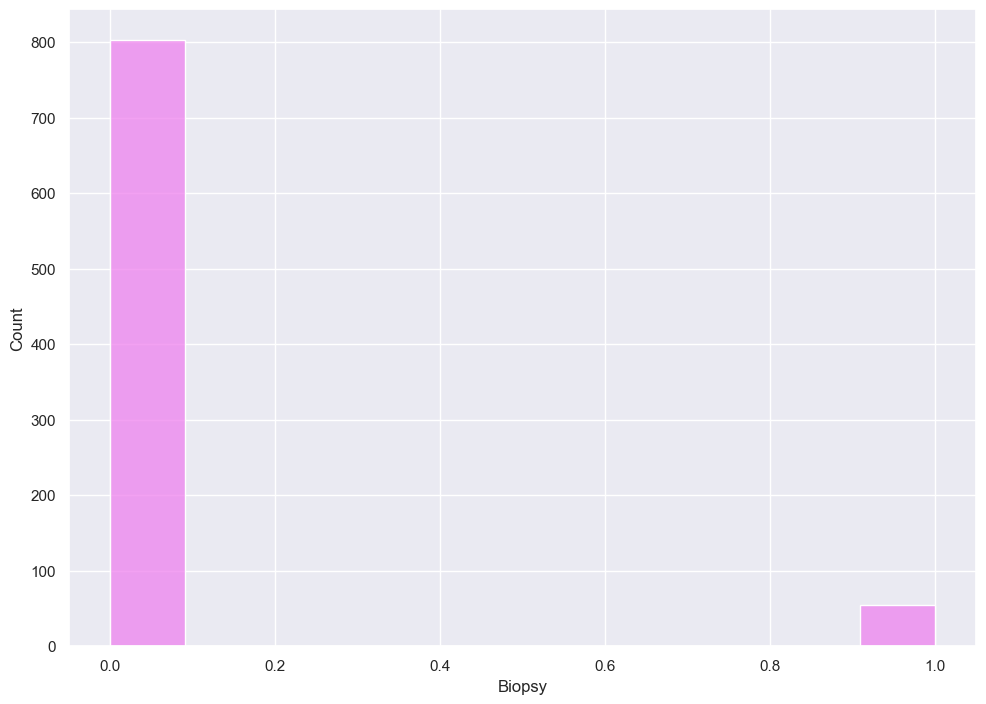

In [10]:
sns.histplot(cleaned_data.Biopsy,color='violet')

In [11]:

cleaned_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
cleaned_data.shape

(858, 33)

In [13]:
cleaned_data.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0


In [14]:
cleaned_data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [16]:
data_outliers=cleaned_data.copy()
outlier_features=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
 'Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)']

Age                                   AxesSubplot(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          AxesSubplot(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Smokes (years)                        AxesSubplot(0.125,0.511739;0.168478x0.167391)
Smokes (packs/year)                AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Hormonal Contraceptives            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Hormonal Contraceptives (years)    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

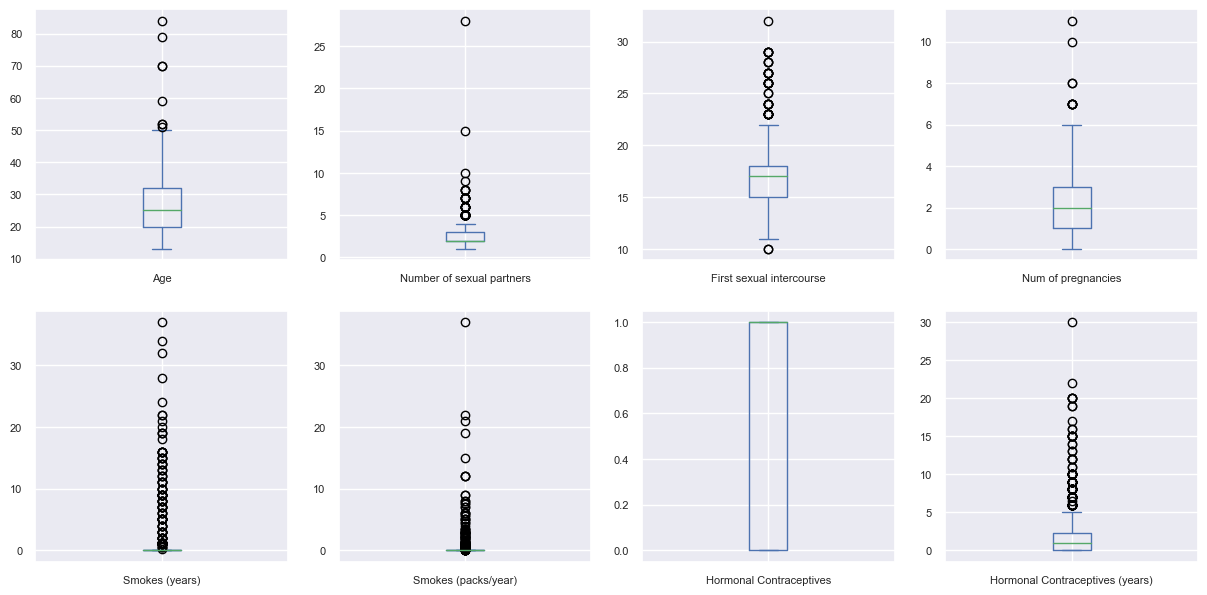

In [17]:
data_outliers[outlier_features].plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(15,15))

In [18]:
IQR=data_outliers[outlier_features].describe().T['75%']-data_outliers[outlier_features].describe().T['25%']
min,max=[data_outliers[outlier_features].describe().T['25%']-(IQR*1.5),data_outliers[outlier_features].describe().T['75%']+(IQR*1.5)]

In [19]:
for i in outlier_features:
    print('range of',i,'between',min[i],'and',max[i])

range of Age between 2.0 and 50.0
range of Number of sexual partners between 0.5 and 4.5
range of First sexual intercourse between 10.5 and 22.5
range of Num of pregnancies between -2.0 and 6.0
range of Smokes (years) between 0.0 and 0.0
range of Smokes (packs/year) between 0.0 and 0.0
range of Hormonal Contraceptives between -1.5 and 2.5
range of Hormonal Contraceptives (years) between -3.3846288020840003 and 5.641048003473333


In [20]:
for i in outlier_features:
    data_outliers[i][data_outliers[i]>max[i]]=max[i]
    data_outliers[i][data_outliers[i]<min[i]]=min[i]

Age                                   AxesSubplot(0.125,0.712609;0.168478x0.167391)
Number of sexual partners          AxesSubplot(0.327174,0.712609;0.168478x0.167391)
First sexual intercourse           AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Num of pregnancies                 AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Smokes (years)                        AxesSubplot(0.125,0.511739;0.168478x0.167391)
Smokes (packs/year)                AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Hormonal Contraceptives            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Hormonal Contraceptives (years)    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

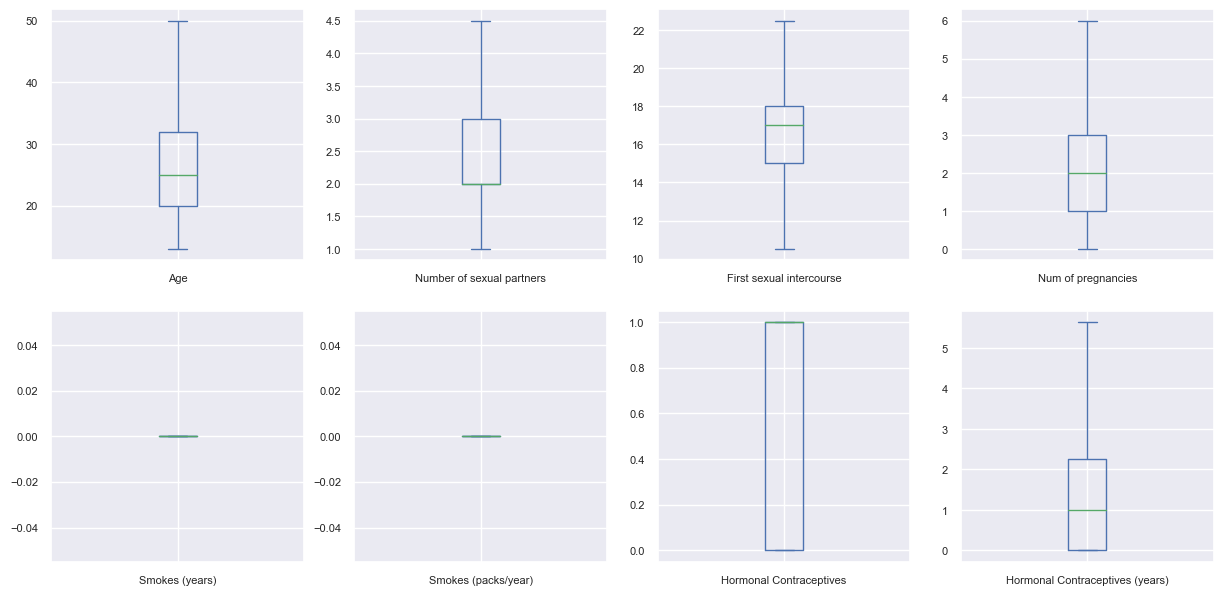

In [21]:
data_outliers[outlier_features].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(15,15))

In [22]:
from sklearn.model_selection import train_test_split as tts
x=data_outliers.drop(columns=['Biopsy'])
y=data_outliers['Biopsy']

In [23]:
from imblearn.over_sampling import SMOTE
over_sampler=SMOTE(random_state=2)
X,Y= over_sampler.fit_resample(x,y)

<AxesSubplot:xlabel='Biopsy', ylabel='Count'>

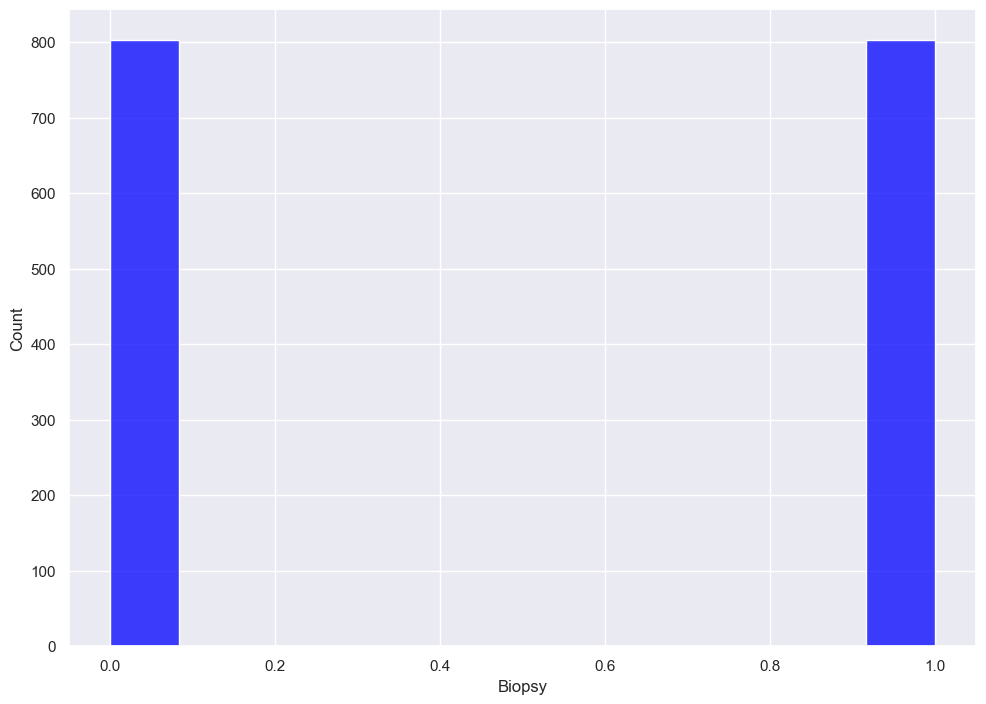

In [24]:
sns.histplot(Y,color='Blue')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model_data= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [26]:
x_train,x_test,y_train,y_test = tts(model_data,Y,test_size=0.2)

In [27]:
x_train.shape

(1284, 32)

In [28]:
x_test.shape

(322, 32)

In [29]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 50, n_estimators = 100)

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
result_train = model.score(x_train, y_train)

result_train

0.9992211838006231

In [31]:
result_test = model.score(x_test, y_test)

result_test

0.9937888198757764

In [32]:
y_predict = model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       176
         1.0       0.99      0.99      0.99       146

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



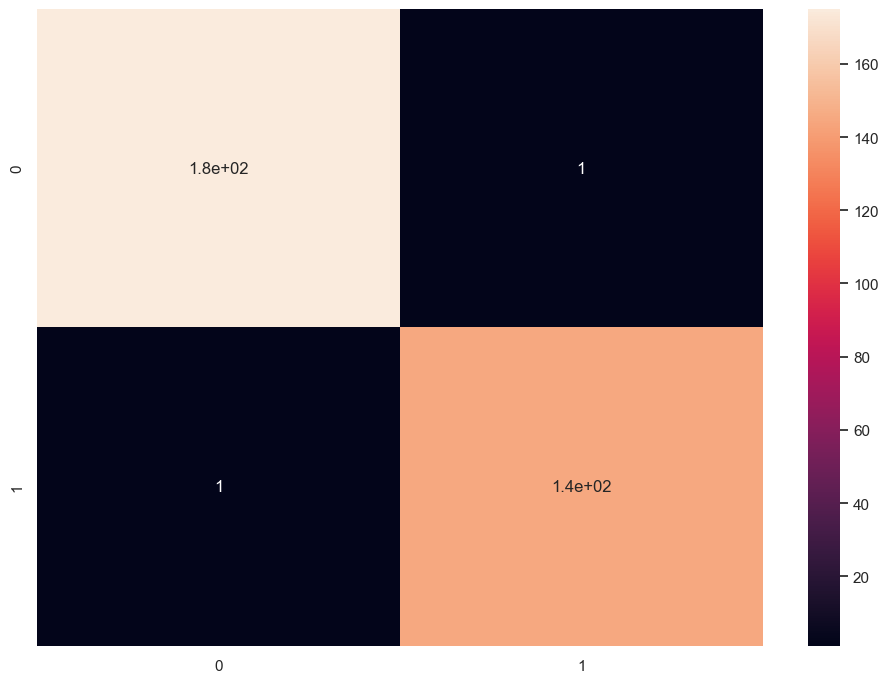

In [34]:
cm = confusion_matrix(y_predict, y_test)

sns.heatmap(cm, annot = True)

plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9641744548286605
Testing accuracy : 0.9751552795031055
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       176
         1.0       0.96      0.99      0.97       146

    accuracy                           0.98       322
   macro avg       0.97      0.98      0.97       322
weighted avg       0.98      0.98      0.98       322

[[170   6]
 [  2 144]]


In [36]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9727414330218068
Testing accuracy : 0.9813664596273292
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       176
         1.0       0.97      0.99      0.98       146

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322

[[172   4]
 [  2 144]]


In [37]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.9937888198757764
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       176
         1.0       0.99      0.99      0.99       146

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322

[[175   1]
 [  1 145]]


In [44]:
model1= LogisticRegression()


model1.fit(x_train, y_train)


pred_prob1 = model1.predict_proba(x_test)



In [45]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.9909713574097136


In [46]:
from sklearn.metrics import roc_auc_score
model2=  RandomForestClassifier()

model2.fit(x_train, y_train)


pred_prob2 = model2.predict_proba(x_test)


In [47]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score2)

0.999766500622665


ROC AUC: 0.9939679327521793


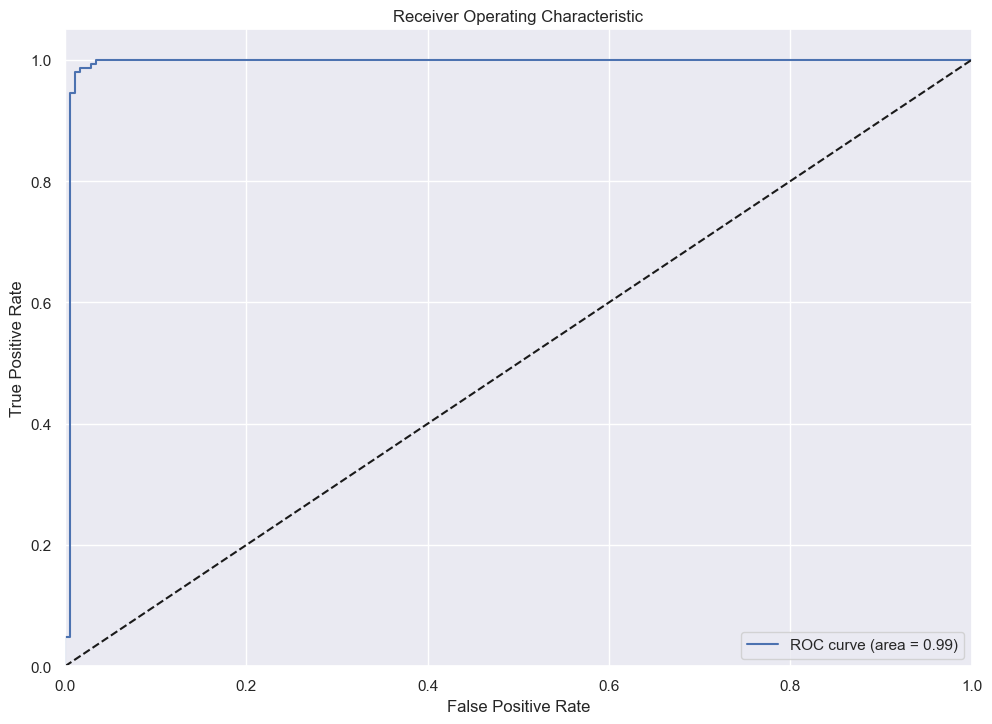

In [48]:
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the SVM model
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train, y_train)

# Obtain predicted probabilities
y_pred_prob = svm_model.predict_proba(x_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


LR: 0.9909713574097136
SVM: 0.9939679327521793
RF: 0.9998443337484433


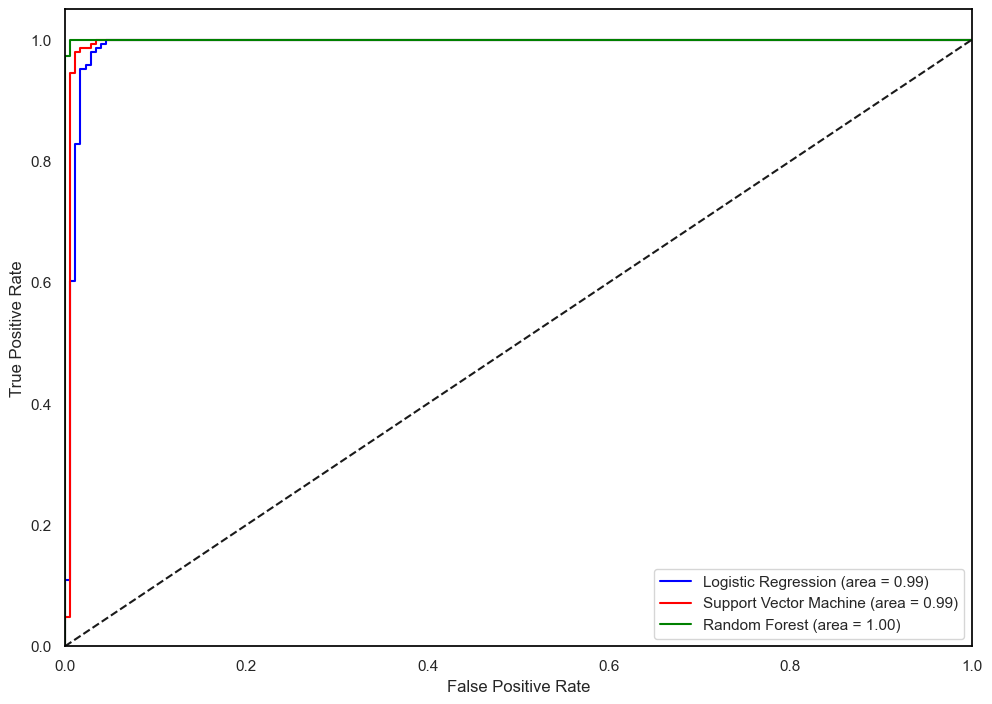

In [69]:
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pred_prob1 = model1.predict_proba(x_test)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

pred_prob2 = model2.predict_proba(x_test)
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train, y_train)

# Obtain predicted probabilities
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# Calculate ROC AUC
roc_auc1 = roc_auc_score(y_test, pred_prob1[:,1])
roc_auc2 = roc_auc_score(y_test, svm_model.predict_proba(x_test)[:,1])
roc_auc3 = roc_auc_score(y_test, pred_prob2[:,1])

print("LR:", roc_auc1)
print("SVM:", roc_auc2)
print("RF:", roc_auc3)

# Calculate ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, svm_model.predict_proba(x_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_prob2[:,1])

plt.rcParams['axes.facecolor'] = 'white'
ax = plt.gca()
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Plot ROC curve
plt.plot(fpr1, tpr1, color='blue', label="Logistic Regression (area = %0.2f)" % roc_auc1)
plt.plot(fpr2, tpr2, color='red', label="Support Vector Machine (area = %0.2f)" % roc_auc2)
plt.plot(fpr3, tpr3, color='green', label="Random Forest (area = %0.2f)" % roc_auc3)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc="lower right")

plt.show()